
# **R Mini Project**
*Statistical Analysis on Top 100 Best Selling Books on Amazon*

**Group Members**
 - Samrudhi Baldota (03)
 - Mrunal   Dhadge  (16)
 - Sammed   Doshi   (18)
 - Aditi    Ingale  (24)             



> # Initialization and Display



In [ ]:
## Importing packages
library(tidyverse) # metapackage with lots of helpful functions
list.files(path = "../input")

character(0)

In [ ]:
# Lets look at amazon's top 100 books
#Kindly add database files for further Processer {Add top_100_books.csv and nyt_bestsellers.csv to Files Section} Which were present with this files.
amazon_books <- read.csv("top_100_books.csv",stringsAsFactors = FALSE)
head(amazon_books)

,X,rank2,book2,author2,ratings2,reviews2,type2,price2
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,1,1,Becoming,Michelle Obama,4.9,13347,Hardcover,17.95
2,2,2,"Girl, Wash Your Face",Rachel Hollis,4.6,10521,Hardcover,13.63
3,3,3,The Wonky Donkey,Craig Smith,4.7,5503,Paperback,4.99
4,4,4,Fire and Fury,Michael Wolff,4.2,9931,Hardcover,15.57
5,5,5,Fear,Bob Woodward,4.5,3220,Hardcover,15.47
6,6,6,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)",Jill Twiss,4.9,8537,Hardcover,10.90


In [ ]:
class(amazon_books)

[1] "data.frame"

In [ ]:
# remove the index col i.e X

amazon_books <- amazon_books[,-1]
head(amazon_books)

,rank2,book2,author2,ratings2,reviews2,type2,price2
,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,1,Becoming,Michelle Obama,4.9,13347,Hardcover,17.95
2,2,"Girl, Wash Your Face",Rachel Hollis,4.6,10521,Hardcover,13.63
3,3,The Wonky Donkey,Craig Smith,4.7,5503,Paperback,4.99
4,4,Fire and Fury,Michael Wolff,4.2,9931,Hardcover,15.57
5,5,Fear,Bob Woodward,4.5,3220,Hardcover,15.47
6,6,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)",Jill Twiss,4.9,8537,Hardcover,10.90


We have 7 columns -
1. Book Rank
2. Book name
3. Author
4. Star Ratings
5. Reviews
6. Type of the book
7. Price

Lets rename the columns with more meaningful names.

In [ ]:
names<- c('book_rank','book_name','author','star_rating',
                       'reviews','book_type','price')

colnames(amazon_books) <- names

head(amazon_books)

,book_rank,book_name,author,star_rating,reviews,book_type,price
,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,1,Becoming,Michelle Obama,4.9,13347,Hardcover,17.95
2,2,"Girl, Wash Your Face",Rachel Hollis,4.6,10521,Hardcover,13.63
3,3,The Wonky Donkey,Craig Smith,4.7,5503,Paperback,4.99
4,4,Fire and Fury,Michael Wolff,4.2,9931,Hardcover,15.57
5,5,Fear,Bob Woodward,4.5,3220,Hardcover,15.47
6,6,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)",Jill Twiss,4.9,8537,Hardcover,10.90




> # Data Preprocessing



In [ ]:
# 1. Are there any na values in the data frame ?

colSums(is.na(amazon_books))

book_rank   book_name      author star_rating     reviews   book_type 
          0           0           0           0           0           0 
      price 
          0

In [ ]:
# 2. Are there any missing values in the data frame ?

complete.cases(amazon_books) %>% sum()

[1] 99

In [ ]:
# 3. Are there empty strings or zero values in the dataframe ?

sum(amazon_books$book_name == "")
sum(amazon_books$author == "")
sum(amazon_books$star_rating == 0)
sum(amazon_books$reviews == 0)
sum(amazon_books$book_type == "")
sum(amazon_books$price == 0)

[1] 0

[1] 8

[1] 0

[1] 0

[1] 0

[1] 1

In [ ]:
#Lets manually input missing values from website wherever data is available

missing_names <- which(amazon_books$author == "")
missing_names
amazon_books$author[59] <- "Bill Martin Jr."
amazon_books$author[68] <- "Valorie Schaefer"
amazon_books$author[94] <- "Bessel van der Kolk M.D."
amazon_books$author[29] <- "Naomi Kleinberg"
amazon_books$author[31] <- "Paper Peony Press"
amazon_books$author[32] <- "6th Edition Publication"
amazon_books$author[41] <- "Instant Pot CookBook"



[1] 26 29 31 32 41 59 68 94

In [ ]:
summary(amazon_books)

   book_rank      book_name            author           star_rating   
 Min.   :  1.0   Length:99          Length:99          Min.   :3.700  
 1st Qu.: 25.5   Class :character   Class :character   1st Qu.:4.400  
 Median : 50.0   Mode  :character   Mode  :character   Median :4.600  
 Mean   : 50.2                                         Mean   :4.578  
 3rd Qu.: 74.5                                         3rd Qu.:4.750  
 Max.   :100.0                                         Max.   :4.900  
    reviews       book_type             price      
 Min.   :  285   Length:99          Min.   : 0.00  
 1st Qu.: 1700   Class :character   1st Qu.: 7.19  
 Median : 3494   Mode  :character   Median :10.99  
 Mean   : 4851                      Mean   :12.92  
 3rd Qu.: 6474                      3rd Qu.:15.72  
 Max.   :25842                      Max.   :54.99  



> # Analytics on top 100 books sold by Amazon



In [ ]:
# 1. Which books got the max star rating ? 
top_stars <- head(amazon_books[order(-amazon_books$star_rating),],10)
top_stars

,book_rank,book_name,author,star_rating,reviews,book_type,price
,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,1,Becoming,Michelle Obama,4.9,13347,Hardcover,17.95
6,6,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)",Jill Twiss,4.9,8537,Hardcover,10.90
16,16,Dog Man,Dav Pilkey,4.9,679,Hardcover,7.00
35,35,Dog Man and Cat Kid,Dav Pilkey,4.9,715,Hardcover,7.00
40,40,Dog Man,Dav Pilkey,4.9,703,Hardcover,6.35
52,52,Wonder,R. J. Palacio,4.9,13244,Hardcover,10.00
56,56,"Everybody, Always",Bob Goff,4.9,1164,Paperback,9.85
13,13,Diary of a Wimpy Kid #13,Jeff Kinney,4.8,640,Hardcover,10.00
14,14,The 5 Love Languages,Gary Chapman,4.8,14189,Paperback,9.59


In [ ]:
# 2. Which books got the max reviews ?
max_reviews <- head(amazon_books[order(-amazon_books$reviews),],5)
max_reviews


,book_rank,book_name,author,star_rating,reviews,book_type,price
,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>
60,60,Beneath a Scarlet Sky,Mark Sullivan,4.7,25842,Paperback,11.99
48,48,Ready Player One,Ernest Cline,4.6,18942,Paperback,12.00
70,70,Where the Crawdads Sing,Delia Owens,4.8,15153,Hardcover,15.60
91,92,The Handmaid's Tale,Margaret Atwood,4.1,14663,Paperback,9.49
82,83,The Life-Changing Magic of Tidying Up,Marie Kondo,4.4,14421,Hardcover,9.69


In [ ]:
# 3. which book got the max star rating and reviews ?
max_rating_stars <- amazon_books %>% group_by(star_rating,reviews) %>% 
       arrange(desc(star_rating,reviews))
max_rating_stars

book_rank,book_name,author,star_rating,reviews,book_type,price
<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,Becoming,Michelle Obama,4.9,13347,Hardcover,17.95
6,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children<U+0092>s Book)",Jill Twiss,4.9,8537,Hardcover,10.90
16,Dog Man,Dav Pilkey,4.9,679,Hardcover,7.00
35,Dog Man and Cat Kid,Dav Pilkey,4.9,715,Hardcover,7.00
40,Dog Man,Dav Pilkey,4.9,703,Hardcover,6.35
52,Wonder,R. J. Palacio,4.9,13244,Hardcover,10.00
56,"Everybody, Always",Bob Goff,4.9,1164,Paperback,9.85
13,Diary of a Wimpy Kid #13,Jeff Kinney,4.8,640,Hardcover,10.00
14,The 5 Love Languages,Gary Chapman,4.8,14189,Paperback,9.59


In [ ]:
# 4. WHich author's books has featured in the top 100 more than once ?
top_authors <- amazon_books %>% group_by(author) %>% summarise(Count = n()) %>%
   filter(Count > 1 ) %>% arrange(desc(Count))

top_authors

author,Count
<chr>,<int>
Wizards RPG Team,4
Dav Pilkey,3
Dr. Steven R Gundry MD,2
Joanna Gaines,2
Rupi Kaur,2


In [ ]:
# 5. WHich type of book has sold a lot ?

max_type <- amazon_books %>% group_by(book_type) %>% summarise(num_of_books = n()) %>% 
                  arrange(desc(num_of_books))

max_type

book_type,num_of_books
<chr>,<int>
Hardcover,49
Paperback,40
Board book,9
Mass Market Paperback,1


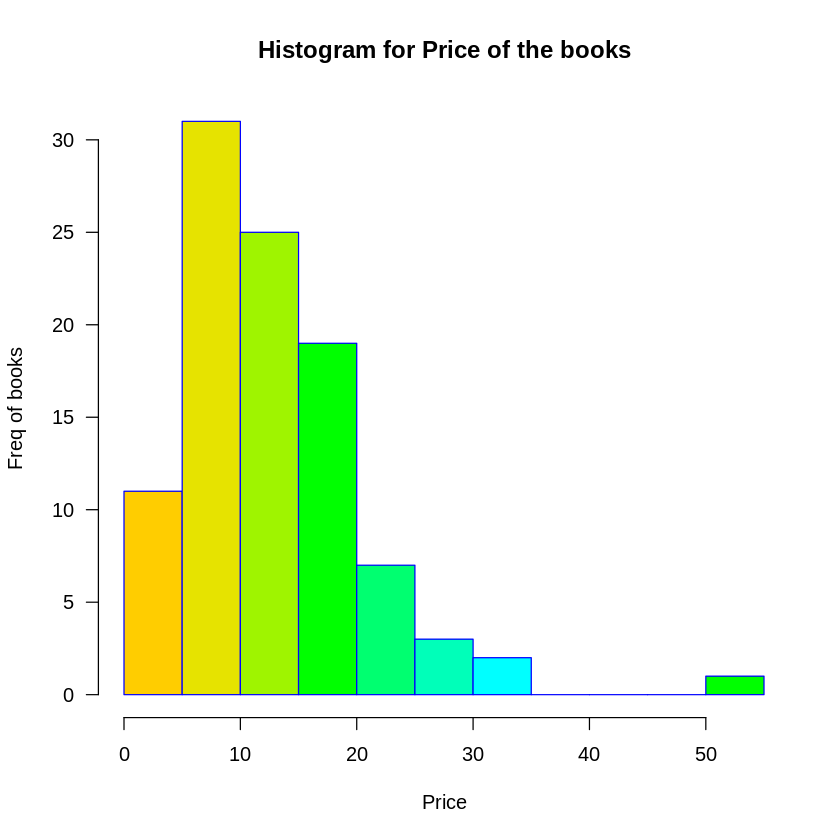

In [ ]:
# 6. What is the price range, that is most present in the top 100 ?

# plot histogram
hist(amazon_books$price,
     main = "Histogram for Price of the books",
     xlab = "Price",
     ylab = "Freq of books",
     border = "blue",
     col = c("#FFCD00","#E6E300","#9FF400","#00FF00","#00FF70","#00FFB9","#00FFFF"),
     las = 1) # rotates the values printed on the y-axis by 1



> # Observations



The value at the last bin seems like an outlier. When examined, this Book was 
Harry Potter series containing all the books from 1 to 7, which makes sense
for this price range.


In [ ]:
# 10. Price range per 10 books

# create breaks for bins
breaks <- c(0,10,20,30,40,50,60,70,80,90,100)

# create labels
labels <- c('1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80',
            '81-90','91-100')

# bucket the data points into bins
bins <- cut(amazon_books$book_rank, breaks, include.lowest = T, right=FALSE, labels=labels)
# inspect bins
summary(bins)


1-10  11-20  21-30  31-40  41-50  51-60  61-70  71-80  81-90 91-100 
     9     10     10     10     10     10     10     10      9     11

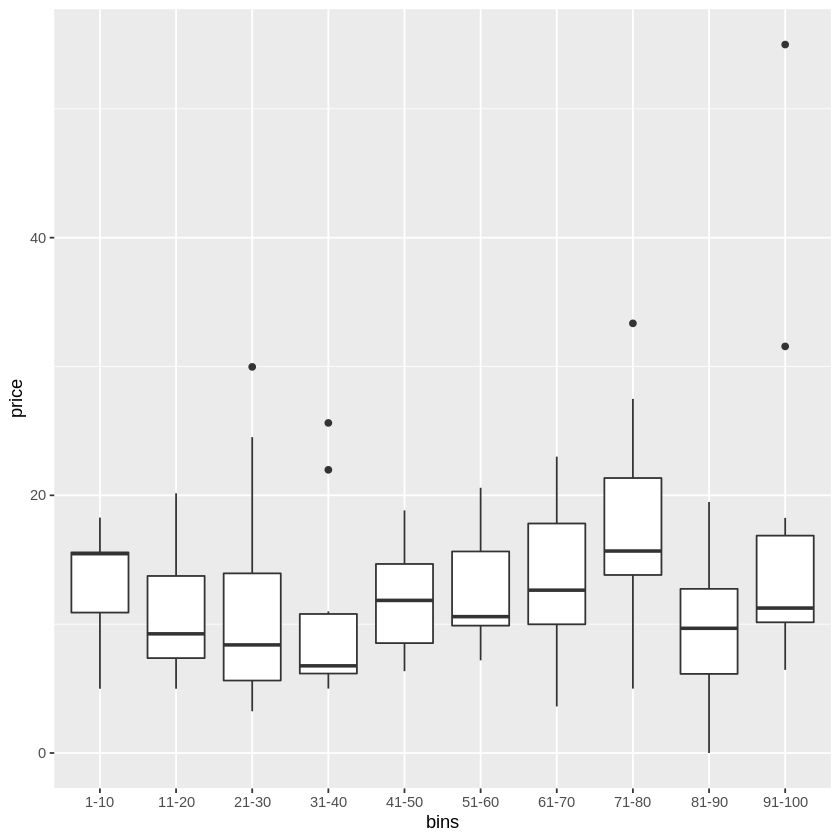

In [ ]:
# plot the bins

ggplot(amazon_books,
       aes(x=bins,y=price))+
  geom_boxplot()


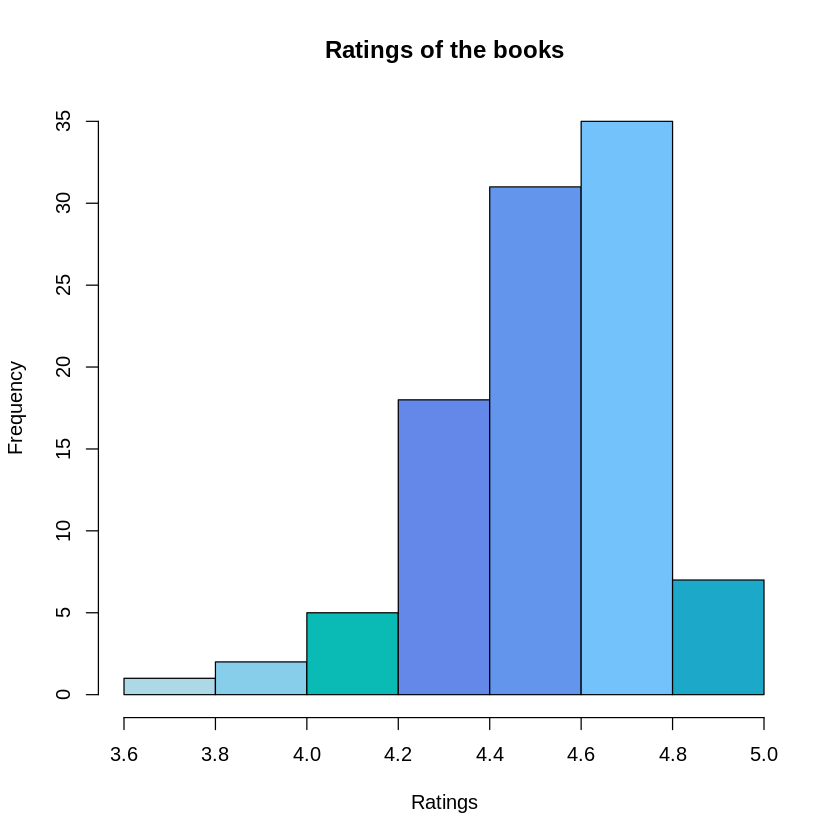

In [ ]:
# Ratings of the books

hist(amazon_books$star_rating,main="Ratings of the books",
          xlab="Ratings",
          col=c("lightblue","skyblue","#0ABAB5","#6488ea","#6495ED","#73C2FB","#1CA9C9"))

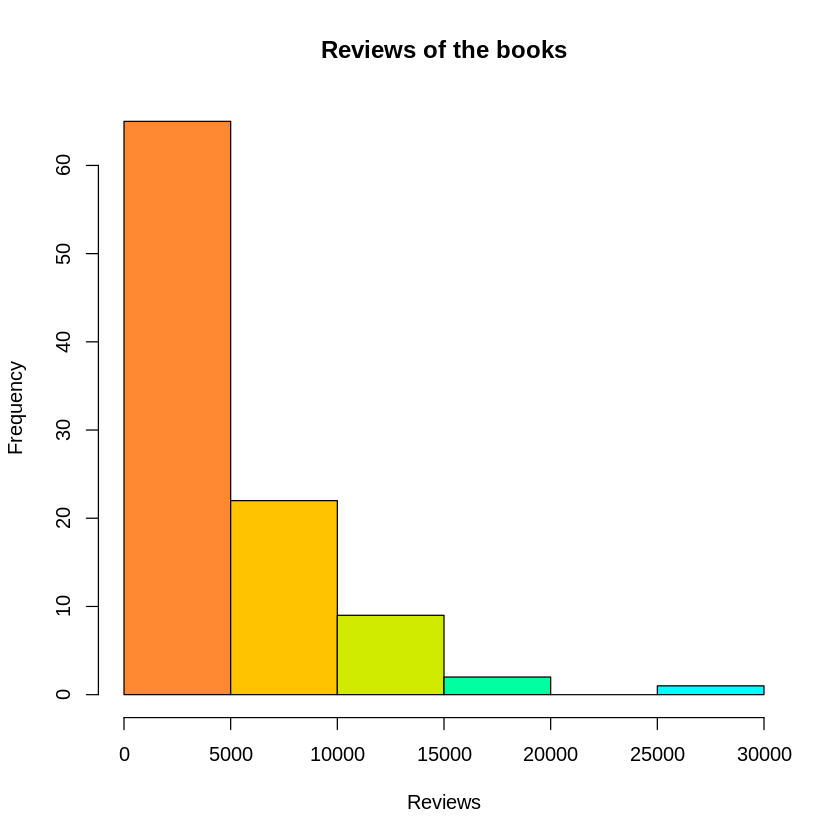

In [ ]:
#Reviews of the Books

hist(amazon_books$reviews,main="Reviews of the books",xlab="Reviews",col=c("#FF8832","#FFC300","#D0EA00","#00FFA1","#00FFFF","#00FFFF"))


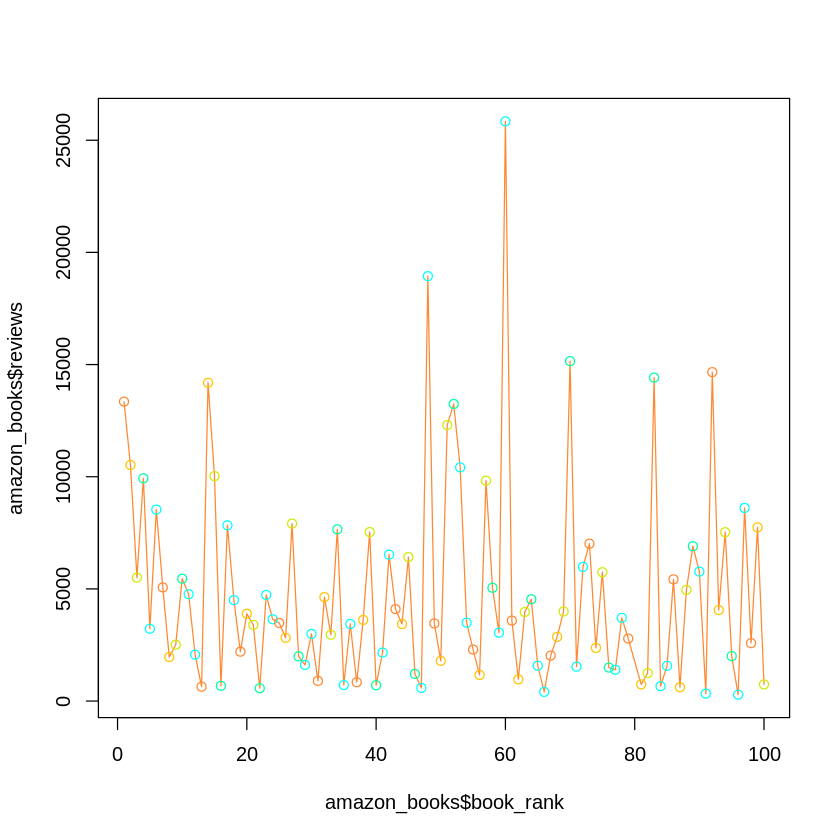

In [ ]:
plot(amazon_books$reviews~amazon_books$book_rank,type = "o",col=c("#FF8832","#FFC300","#D0EA00","#00FFA1","#00FFFF","#00FFFF"))

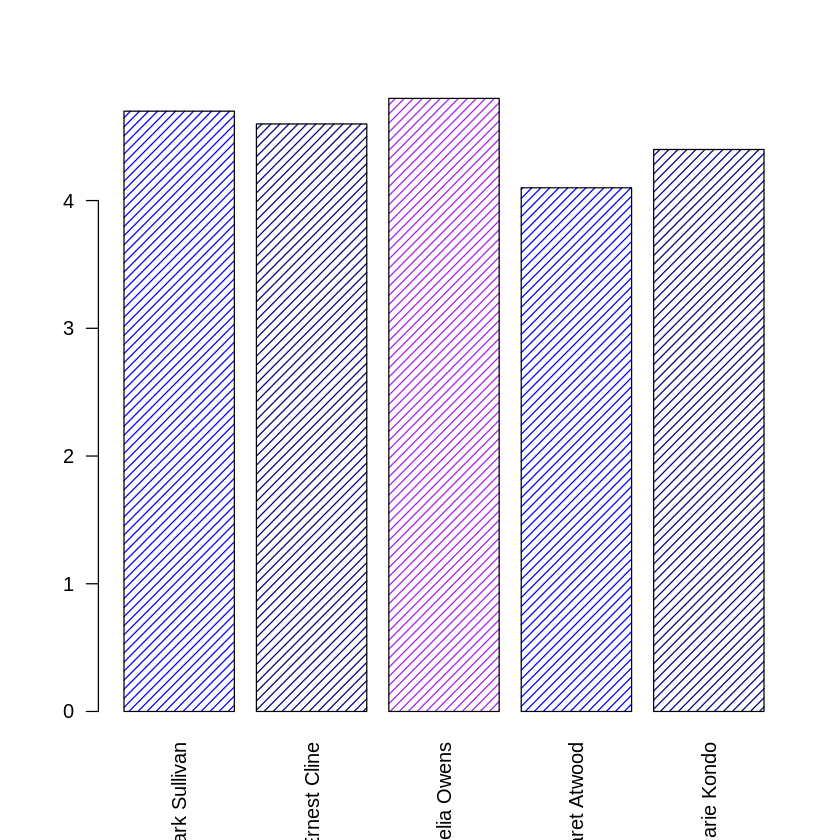

In [ ]:
#Edit Required
barplot(max_reviews$star_rating,names.arg=max_reviews$author,col=c("blue","navy","purple"),density=20,las =2,cex.names = 1, srt = 60,
     xpd = TRUE )

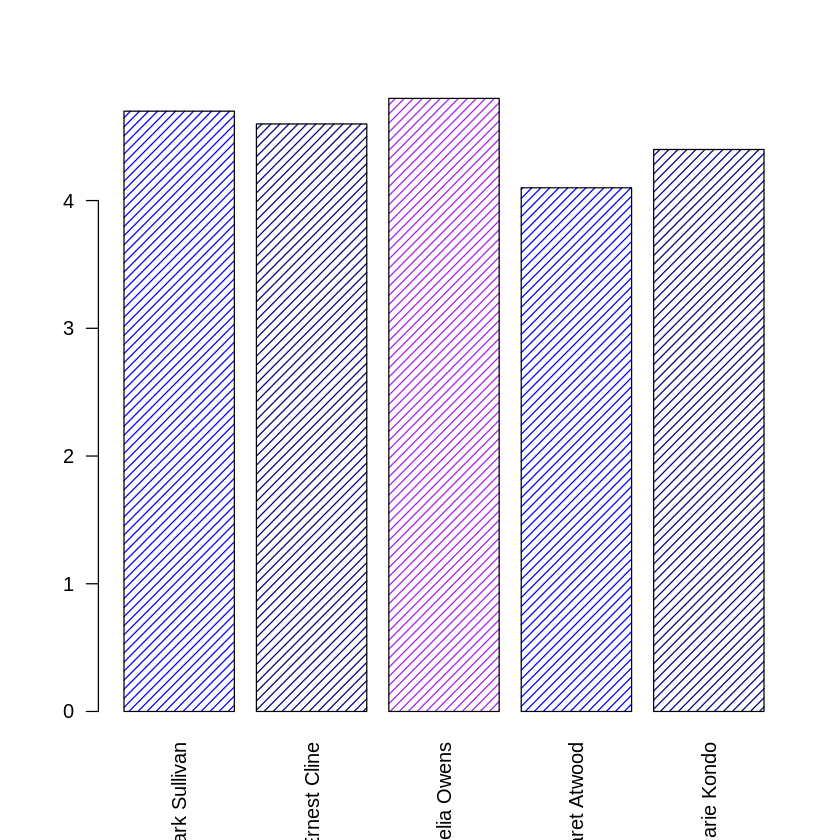

In [ ]:
barplot(max_reviews$star_rating,names.arg=max_reviews$author,col=c("blue","navy","purple"),density=20,las =2,cex.names = 1, srt = 60,
     xpd = TRUE )

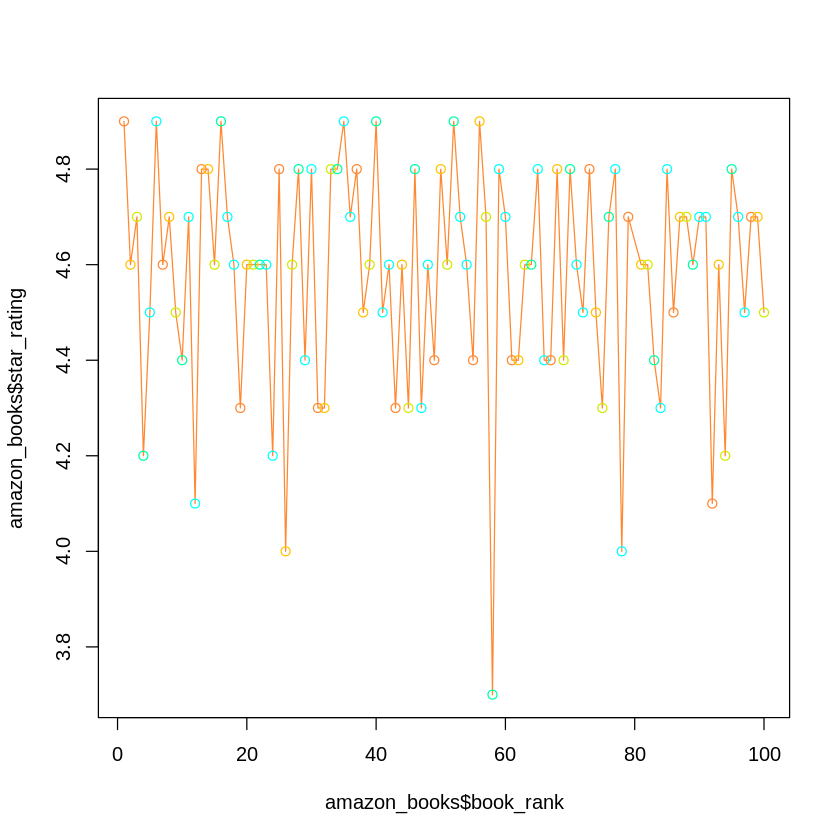

In [ ]:
plot(amazon_books$star_rating~amazon_books$book_rank,type = "o",col=c("#FF8832","#FFC300","#D0EA00","#00FFA1","#00FFFF","#00FFFF"))

In [ ]:
bestsellers <- read.csv("nyt_bestsellers.csv",stringsAsFactors = FALSE)
head(bestsellers)

,X,book_name,genre
,<int>,<chr>,<chr>
1,1,I Love Dad with The Very Hungry Caterpillar,children
2,2,The Wonderful Things You Will Be,children
3,3,Dr. Seuss's I Love Pop!: A Celebration of Dads,children
4,4,Dragons Love Tacos,children
5,5,How to Babysit a Grandpa,children
6,6,I Wish You More,children


In [ ]:
byrating = function(genre){
     values =c(which(amazon_books$star_rating == genre))
     print(amazon_books$book_name[values[1]])
     print(amazon_books$book_name[values[2]])
     print(amazon_books$book_name[values[3]])
 }

 


In [ ]:
summary(bestsellers)

       X           book_name            genre          
 Min.   :  1.00   Length:110         Length:110        
 1st Qu.: 28.25   Class :character   Class :character  
 Median : 55.50   Mode  :character   Mode  :character  
 Mean   : 55.50                                        
 3rd Qu.: 82.75                                        
 Max.   :110.00                                        

In [ ]:
bestsellers %>% count(genre)

genre,n
<chr>,<int>
children,30
fiction,30
misc,10
non-fiction,30
young_adult,10


In [ ]:
bestsellers

Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 2 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         st

X,book_name,genre
<int>,<chr>,<chr>
1,I Love Dad with The Very Hungry Caterpillar,children
2,The Wonderful Things You Will Be,children
3,Dr. Seuss's I Love Pop!: A Celebration of Dads,children
4,Dragons Love Tacos,children
5,How to Babysit a Grandpa,children
6,I Wish You More,children
7,Grumpy Monkey,children
8,The Day the Crayons Quit,children
9,"Dear Girl,",children


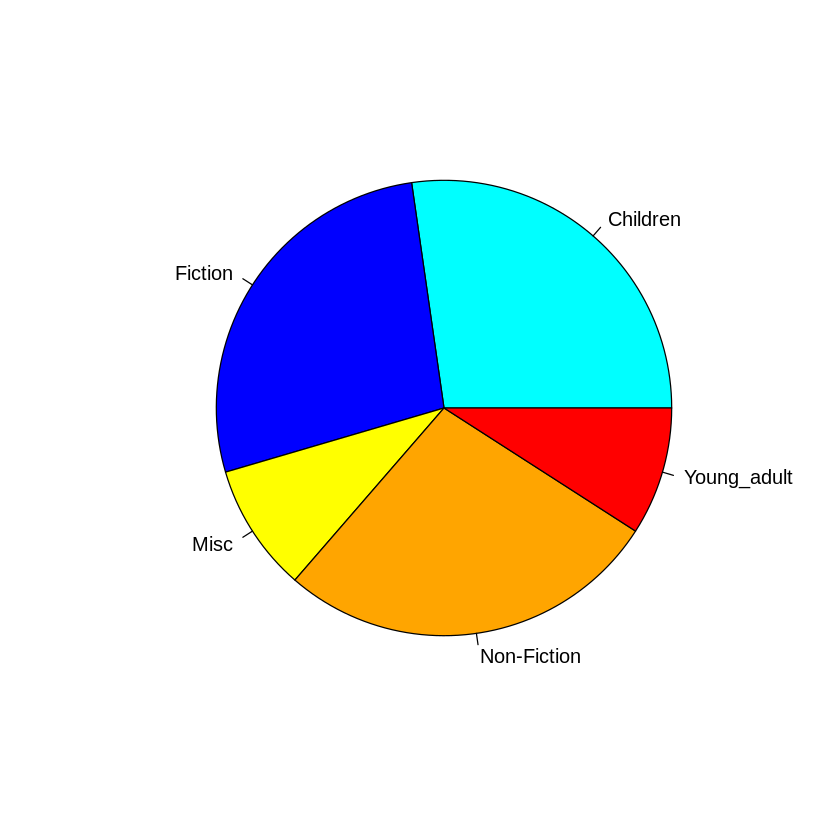

In [ ]:
#pie chart of genre

g<-c(30,30,10,30,10)
names(g) <- c("Children", "Fiction","Misc","Non-Fiction","Young_adult")
pie(g, col = c("cyan", "blue", "yellow","orange","red"))






> # Recommendation using Rating

Enter Rarting which so that we can suggest three books in that categories.





In [ ]:
var = readline(); 

4.2


In [ ]:
data = byrating(var)
data

[1] "Fire and Fury"
[1] "Crazy Rich Asians (Crazy Rich Asians Trilogy)"
[1] "\n            The Great Gatsby\n        "


[1] "\n            The Great Gatsby\n        "

In [ ]:
#each_book_rating = pd.pivot_table(amazon_books, index='rank2', values='ratings2', columns='book2', fill_value=0)